## Week 3 Homework 2023

### Dataset
In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv). I will get it with wget.

In [7]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
!wget -O car_data.csv $data

--2025-10-05 14:26:44--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]   1.41M  --.-KB/s    in 0.01s   

2025-10-05 14:26:44 (94.9 MB/s) - ‘car_data.csv’ saved [1475504/1475504]



You don't need to re-run the first cell everytime as the first cell is trying to get the data in your system.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("car_data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [11]:
columns = ["Make","Model", "Year", "Engine HP", "Engine Cylinders", "Transmission Type", "Vehicle Style", "highway MPG", "city mpg", "MSRP"]
df = df[columns]
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [12]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [13]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [15]:
df = df.fillna(0)

In [16]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [19]:
df = df.rename(columns={'msrp': 'price'})
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- `AUTOMATIC`
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`


In [25]:
df.transmission_type.mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

The most requent observation (mode) for the column transmission_type is "Automatic".

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg`

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [27]:
data_numeric = df.copy()
data_numeric = data_numeric.drop(['make', 'model', 'transmission_type', 'vehicle_style', 'price'], axis=1)
data_numeric.describe()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000
mean,2010.384338,247.941749,5.614655,26.637485,19.733255
std,7.579740,110.507669,1.800554,8.863001,8.987798
min,1990.000000,0.000000,0.000000,12.000000,7.000000
25%,2007.000000,170.000000,4.000000,22.000000,16.000000
50%,2015.000000,225.000000,6.000000,26.000000,18.000000
75%,2016.000000,300.000000,6.000000,30.000000,22.000000
max,2017.000000,1001.000000,16.000000,354.000000,137.000000


In [29]:
data_numeric.corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.338714,-0.040708,0.258240,0.198171
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000


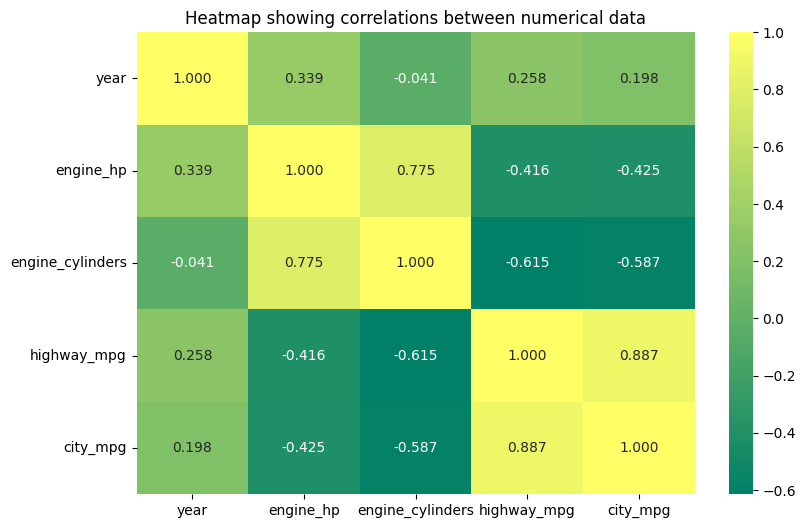

In [30]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_numeric.corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

data_numeric.corr().unstack().sort_values(ascending = False)

The two features that have the biggest correlation in this dataset are city_mpg and highway_mpg with 0.886829.

In [34]:
np.corrcoef(df['city_mpg'], df['highway_mpg'])[0, 1]

np.float64(0.8868294962591357)

### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

In [35]:
df['price'].mean()

np.float64(40594.737032063116)

In [36]:
data_class = df.copy()
mean = data_class['price'].mean()

data_class['above_average'] = np.where(data_class['price'] >= mean, 1, 0)

This is the next way you can change your numeric column into 0, 1\
data_class = df.copy()\
mean = data_class['price'].mean()\
data_class['above_average'] = data_class['price'].map(lambda x:1 if x>=mean else 0)

In [40]:
data_class = data_class.drop(columns=['price'],axis= 0)
data_class

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1


### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`above_average`) is not in your dataframe.

In [38]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error

In [42]:
df_full_train, df_test = train_test_split(data_class, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

assert len(data_class) == (len(df_train) + len(df_val) + len(df_test))

In [43]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [44]:
y_train = df_train.above_average.values
y_test = df_test.above_average.values
y_val = df_val.above_average.values

### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- `transmission_type`
- `vehicle_style`

In [47]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_average          int64
dtype: object

In [48]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

In [50]:
cat = ['make', 'model', 'transmission_type', 'vehicle_style']
mi = df_train[cat].apply(calculate_mi)
mi = mi.sort_values(ascending=False).to_frame(name='MI')
mi

,MI
model,0.462344
make,0.239769
vehicle_style,0.084143
transmission_type,0.020958


transmission_type has the lowest score.

In [57]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

assert 'above_average' not in df_train.columns
assert 'above_average' not in df_val.columns
assert 'above_average' not in df_test.columns

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95


In [58]:
dv= DictVectorizer(sparse =False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [59]:
model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [60]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [63]:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(f'Accuracy = {accuracy}')

Accuracy = 0.93
